# Carregando os Pacotes Necessário

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

from minisom import MiniSom





# Carregando e Padronizando os Dados

In [2]:
df = pd.read_csv("Dados Clusterizacao.csv", sep=';')

In [3]:
df.head()

,Estados,UF,Celular,Conversor Digital,Modem TV Internet,Notebook,Receptor de TV por assinatura,Roteador WIFI,Ventilador de Teto,Ventilador ou Circulador de Ar,Freezer,Ar Condicionado,Microondas,Consumo residencial por UF (2019),Densidade de moradores por comodo,Rendimento Medio Anual,Duas ou mais TV tela fina,Geladeira
0,Acre,AC,"0,97","0,1","0,23","0,18","0,18","0,13","0,04","0,72","0,12","0,26","0,26",491,"0,72",1032,"23,2","91,8"
1,Alagoas,AL,"0,98","0,19","0,5","0,15","0,05","0,01",0,"0,88","0,02","0,04","0,4",1825,"0,548",794,"18,1","97,2"
2,Amapa,AP,"0,98","0,2","0,35","0,17","0,03","0,03","0,02","0,81","0,22","0,32","0,25",525,"0,843",976,"29,4","94,2"
3,Amazonas,AM,"0,97","0,18","0,26","0,17","0,14","0,03","0,01","0,94","0,1","0,43","0,27",2037,"0,83",908,"32,1","91,4"
4,Bahia,BA,"0,97","0,21","0,45","0,21","0,12","0,03","0,03","0,7","0,05","0,04","0,45",7342,"0,51",1008,"21,5","95,4"


In [4]:
# Definir a coluna 'UF' como índice das linhas
df.set_index('UF', inplace=True)
df.drop(columns='Estados', inplace=True)
df.index.name = None

df.head()

,Celular,Conversor Digital,Modem TV Internet,Notebook,Receptor de TV por assinatura,Roteador WIFI,Ventilador de Teto,Ventilador ou Circulador de Ar,Freezer,Ar Condicionado,Microondas,Consumo residencial por UF (2019),Densidade de moradores por comodo,Rendimento Medio Anual,Duas ou mais TV tela fina,Geladeira
AC,"0,97","0,1","0,23","0,18","0,18","0,13","0,04","0,72","0,12","0,26","0,26",491,"0,72",1032,"23,2","91,8"
AL,"0,98","0,19","0,5","0,15","0,05","0,01",0,"0,88","0,02","0,04","0,4",1825,"0,548",794,"18,1","97,2"
AP,"0,98","0,2","0,35","0,17","0,03","0,03","0,02","0,81","0,22","0,32","0,25",525,"0,843",976,"29,4","94,2"
AM,"0,97","0,18","0,26","0,17","0,14","0,03","0,01","0,94","0,1","0,43","0,27",2037,"0,83",908,"32,1","91,4"
BA,"0,97","0,21","0,45","0,21","0,12","0,03","0,03","0,7","0,05","0,04","0,45",7342,"0,51",1008,"21,5","95,4"


In [5]:
df.index

Index(['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS',
       'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC',
       'SP', 'SE', 'TO'],
      dtype='object')

In [6]:
df = df.replace({',': '.'}, regex=True)
df = df.astype(float)
df.head()

,Celular,Conversor Digital,Modem TV Internet,Notebook,Receptor de TV por assinatura,Roteador WIFI,Ventilador de Teto,Ventilador ou Circulador de Ar,Freezer,Ar Condicionado,Microondas,Consumo residencial por UF (2019),Densidade de moradores por comodo,Rendimento Medio Anual,Duas ou mais TV tela fina,Geladeira
AC,0.97,0.10,0.23,0.18,0.18,0.13,0.04,0.72,0.12,0.26,0.26,491.0,0.720,1032.0,23.2,91.8
AL,0.98,0.19,0.50,0.15,0.05,0.01,0.00,0.88,0.02,0.04,0.40,1825.0,0.548,794.0,18.1,97.2
AP,0.98,0.20,0.35,0.17,0.03,0.03,0.02,0.81,0.22,0.32,0.25,525.0,0.843,976.0,29.4,94.2
AM,0.97,0.18,0.26,0.17,0.14,0.03,0.01,0.94,0.10,0.43,0.27,2037.0,0.830,908.0,32.1,91.4
BA,0.97,0.21,0.45,0.21,0.12,0.03,0.03,0.70,0.05,0.04,0.45,7342.0,0.510,1008.0,21.5,95.4


In [7]:
# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.head()

,Celular,Conversor Digital,Modem TV Internet,Notebook,Receptor de TV por assinatura,Roteador WIFI,Ventilador de Teto,Ventilador ou Circulador de Ar,Freezer,Ar Condicionado,Microondas,Consumo residencial por UF (2019),Densidade de moradores por comodo,Rendimento Medio Anual,Duas ou mais TV tela fina,Geladeira
AC,0.407268,-0.742936,-0.946237,-0.560014,0.374724,0.768302,-0.249660,-0.346021,-0.282020,0.672041,-0.983098,-0.618533,1.315193,-0.689577,-0.651195,-2.018809
AL,0.657182,0.736847,0.948836,-0.965024,-0.940557,-1.323545,-0.664481,0.699301,-1.167433,-0.950692,-0.271199,-0.446529,-0.195506,-1.170031,-1.230829,0.058413
AP,0.657182,0.901267,-0.103982,-0.695017,-1.142907,-0.974904,-0.457071,0.241973,0.603392,1.114604,-1.033948,-0.614149,2.395519,-0.802625,0.053459,-1.095599
AM,0.407268,0.572426,-0.735673,-0.695017,-0.029978,-0.974904,-0.560776,1.091297,-0.459103,1.925971,-0.932248,-0.419194,2.281338,-0.939898,0.360325,-2.172678
BA,0.407268,1.065687,0.597897,-0.155004,-0.232329,-0.974904,-0.353366,-0.476686,-0.901809,-0.950692,-0.016950,0.264826,-0.529265,-0.738026,-0.844406,-0.633994


# Método Hierárquico de Ligação Média

In [72]:
# Aplicando o método de ligação média
Z = linkage(df_scaled, method='average', metric='euclidean')

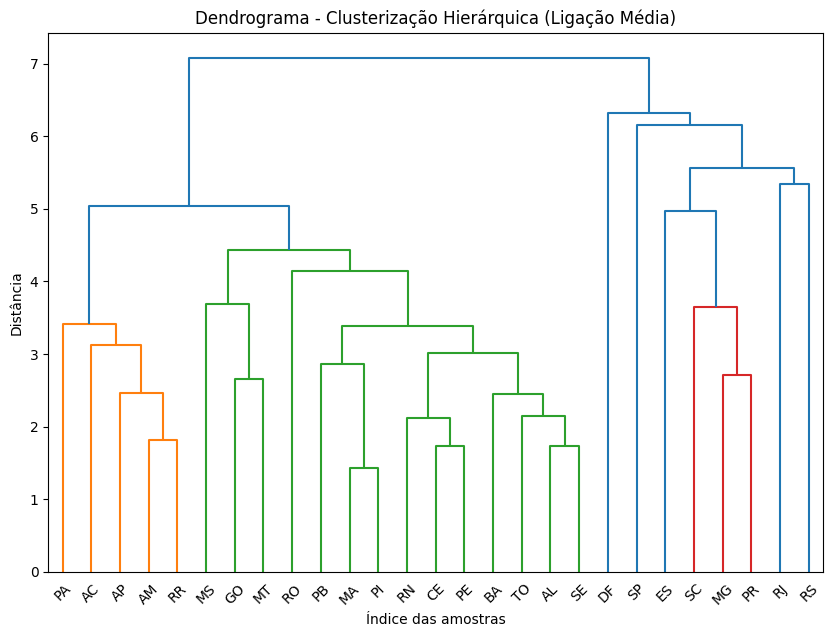

In [73]:
# Plotando o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_scaled.index)
plt.title('Dendrograma - Clusterização Hierárquica (Ligação Média)')
plt.xlabel('Índice das amostras')
plt.ylabel('Distância')
plt.show()

Rótulos de Cluster: [3 1 3 3 1 1 4 0 1 1 1 5 5 3 1 5 1 1 2 1 2 1 3 5 0 1 1]


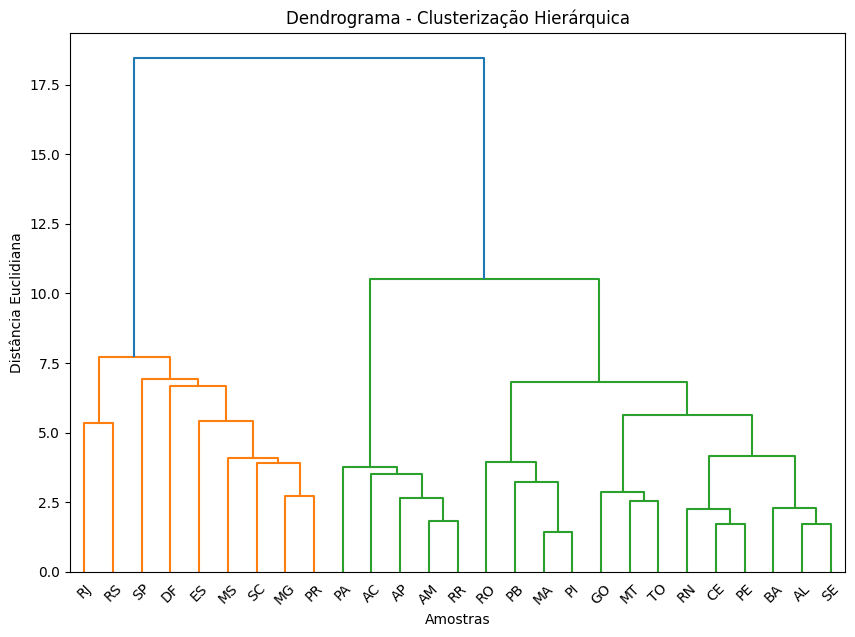

In [74]:
# Realizar a clusterização hierárquica (sem o parâmetro affinity para 'ward')
clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')  # ou 'complete', 'single', etc.

# Ajustar o modelo aos dados
clustering.fit(df_scaled)

# Exibir os rótulos (clusters) atribuídos a cada amostra
print("Rótulos de Cluster:", clustering.labels_)

# Gerar o dendrograma para visualizar a hierarquia
Z = sch.linkage(df_scaled, method='ward', metric='euclidean')

# Gerar o gráfico do dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(Z, labels=df_scaled.index)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()


# Método de K-means

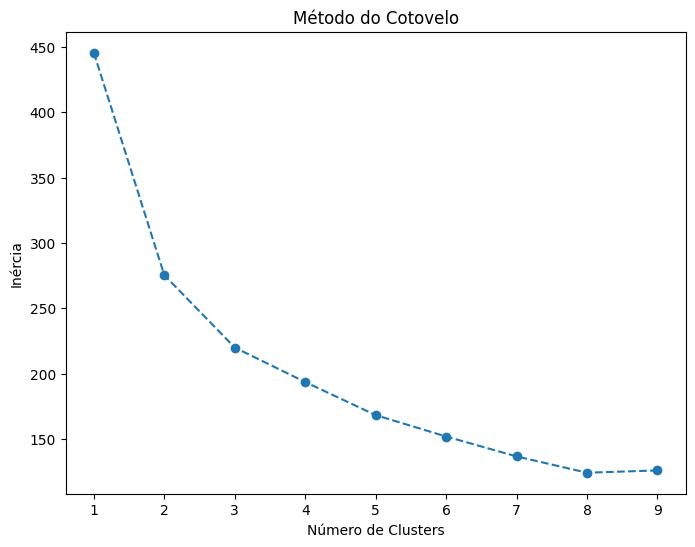

In [71]:
# Método do Cotovelo
inertia = []  # Lista para armazenar as inércias
n_it = 10

# Vamos testar de 1 até 10 clusters (você pode ajustar esse intervalo)
for k in range(1, n_it):
    kmeans = KMeans(
    n_clusters=k,        # Número de clusters
    init='random',    # Método de inicialização
    max_iter=300,        # Máximo de iterações
    n_init=10,           # Número de inicializações
    # tol=1e-3,            # Tolerância
    # algorithm='elkan',   # Algoritmo usado
    # verbose=1,           # Depuração
    random_state=42     # Reprodutibilidade
    )
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Inércia para o número de clusters k

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_it), inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Com base no gráfico, você pode escolher o número de clusters onde a curva começa a se estabilizar

In [65]:
# Aplicando K-means com 3 clusters
kmeans = KMeans(
    n_clusters=3,        # Número de clusters
    init='random',    # Método de inicialização
    max_iter=300,        # Máximo de iterações
    n_init=10,           # Número de inicializações
    # tol=1e-3,            # Tolerância
    # algorithm='elkan',   # Algoritmo usado
    # verbose=1,           # Depuração
    random_state=42     # Reprodutibilidade
)

kmeans.fit(df_scaled)

# Atribuindo os clusters ao dataframe
df_scaled['Cluster'] = kmeans.labels_

In [28]:
# Se os dados tiverem mais de 2 dimensões, use PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))  # Remover a coluna 'Cluster' para usar apenas as features

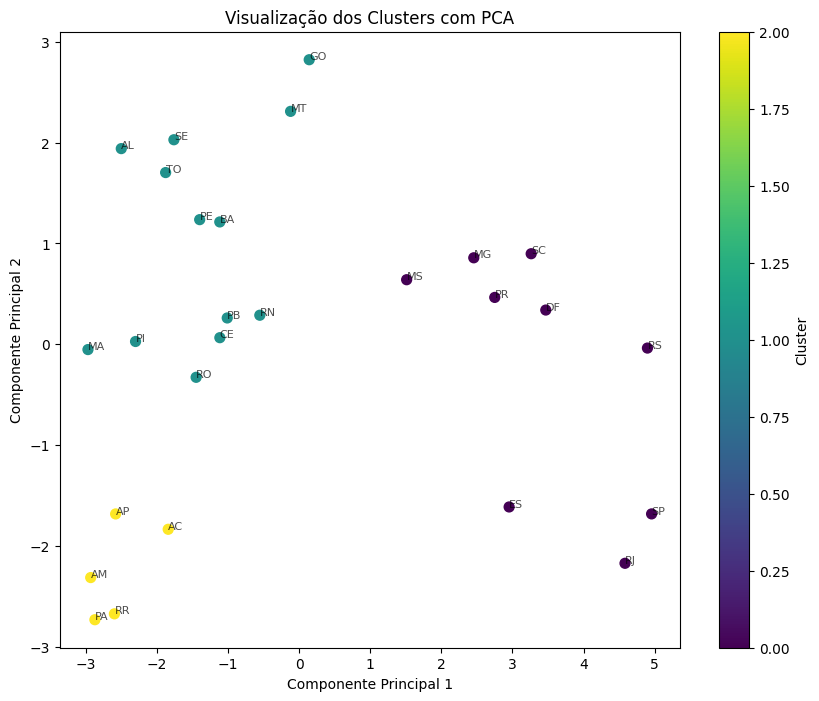

In [66]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['Cluster'], cmap='viridis', s=50)

# Adicionando os índices reais de cada linha no dataframe
for i in range(df_pca.shape[0]):
    plt.annotate(df_scaled.index[i], (df_pca[i, 0], df_pca[i, 1]), fontsize=8, color='black', alpha=0.7)

# Adicionando título e rótulos
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')

# Exibindo o gráfico
plt.show()


# Método de Redes Neurais não supervisionadas

In [81]:
df_scaled.shape[1]

17

Treinando o SOM...
Treinamento concluído!


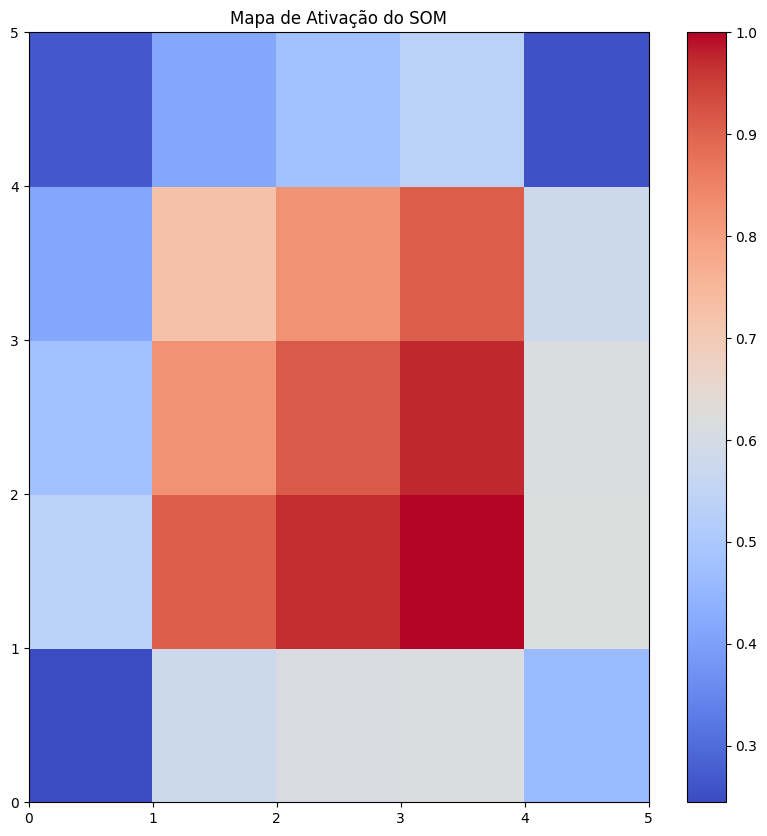

Número de clusters encontrados pelo SOM: 7


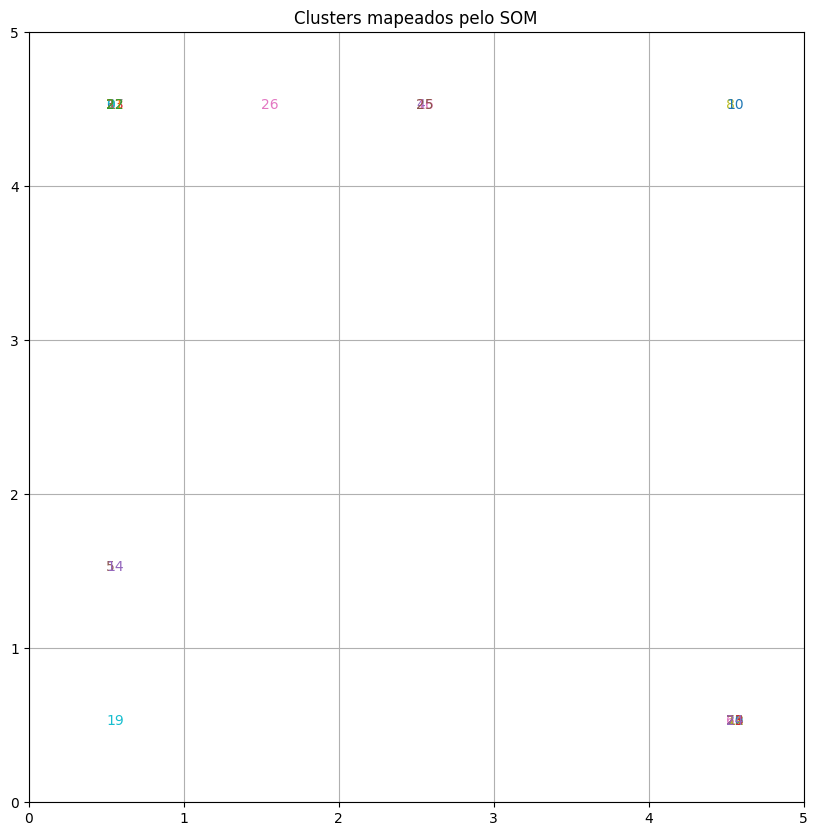

In [103]:
# 1. Preparar os dados
data = df_scaled.values  # Converte o dataframe para um array NumPy (se ainda não estiver)

# 2. Configurar o SOM
som_dim = (5, 5)  # Dimensão da grade do SOM (ajuste conforme necessário)
som = MiniSom(x=som_dim[0], 
              y=som_dim[1], 
              input_len=data.shape[1],
              neighborhood_function = 'gaussian', 
              sigma=10.0, 
              learning_rate=0.05, 
              random_seed=42)

som.random_weights_init(data)

# 3. Treinar o SOM
print("Treinando o SOM...")
som.train_random(data, num_iteration=10000)  # Ajuste o número de iterações conforme necessário
print("Treinamento concluído!")

# 4. Visualizar o mapa de ativação
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Mapa de distâncias dos pesos
plt.colorbar()
plt.title("Mapa de Ativação do SOM")
plt.show()

# 5. Mapear os clusters
winner_coordinates = np.array([som.winner(x) for x in data])  # Neurônio vencedor para cada ponto
unique_clusters = np.unique(winner_coordinates, axis=0)  # Coordenadas únicas dos clusters

print(f"Número de clusters encontrados pelo SOM: {len(unique_clusters)}")

# 6. Visualizar os clusters no mapa
plt.figure(figsize=(10, 10))
for i, x in enumerate(data):
    w = som.winner(x)  # Neurônio vencedor
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color='C' + str(i % 10), fontdict={'size': 10})

plt.xlim([0, som_dim[0]])
plt.ylim([0, som_dim[1]])
plt.title("Clusters mapeados pelo SOM")
plt.grid()
plt.show()